### Example for RichValues: Linear Fit

In this tutorial, we make a linear fit of a set of points whith uncertainties and also finite intervals and upper/lower limits.

First, we import the modules and libraries to be used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import richvalues as rv

Let's load the data points.

In [4]:
data = rv.rich_dataframe(pd.read_csv('linear-data.csv'))
data

,x,y
0,< 20,6+/-4
1,2.7+/-1.1,16+/-3
2,3.4+/-1.2,16+/-4
3,4.4+/-0.7,15+/-3
4,8.6+/-0.9,30+/-4
5,8.7+/-1.2,30+/-4
6,10.0+/-0.9,32+/-4
7,11.1+/-1.5,36+/-3
8,11.9+/-0.8,42+/-4
9,13.3+/-0.7,36+/-5


We have 30 set of points $(x,y)$.

Let's plot the values to see how they look.

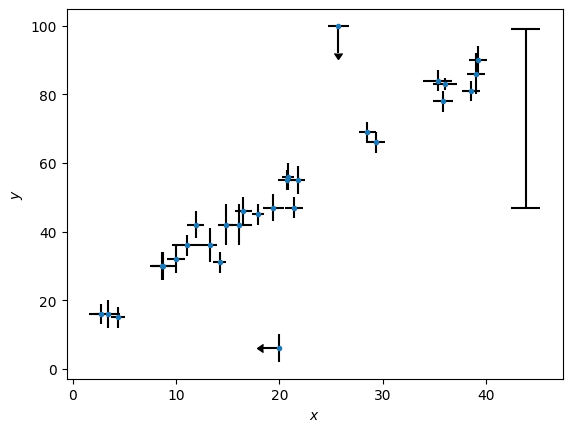

In [10]:
x = rv.rich_array(data['x'].values)
y = rv.rich_array(data['y'].values)
rv.errorbar(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Indeed, it seems that the data follow a linear tren. Let's make a fit to a line, then.

We will use the function `rv.curve_fit`, which uses SciPy's function `minimize`, from its module `optimize`. It uses a bootstrap algorithm.

In [12]:
result = rv.curve_fit(x, y, lambda x,m,b: m*x+b, guess=[2.,10.],
                      consider_arg_intervs=True)

Fitting...
  25 %
  50 %
  75 %
  100 %


That's it! It was easy. Now, we can access to the output of the fit.

In [16]:
slope, offset = result['parameters']
dispersion = result['dispersion']
samples = result['parameters samples']
slope

1.92+/-0.07

Actually, the ground truth is as follows:

In [18]:
slope_true, offset_true = 2, 10
dispersion_x, dispersion_y = 0.6, 3
errorbar_x, errorbar_y = 0.9, 3.6

Let's make a plot showing our fitted line.

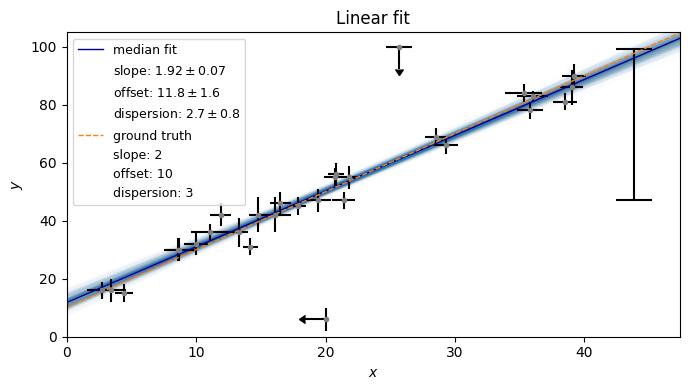

In [23]:
# Some options.
plot_truth = True
color_fit = 'darkblue'
color_samples = 'tab:blue'
color_truth = 'tab:orange'
# Plot of the data and the fit.
plt.figure(1, figsize=(7,4))
plt.clf()
rv.errorbar(x, y, color='gray')
xlims = plt.xlim()
ylims = plt.ylim()
x_ = np.linspace(0, xlims[1], 4)
plt.plot(x_, slope.main * x_ + offset.main, color=color_fit, lw=1,
         label='median fit')
plt.plot([], [], alpha=0, label='slope: {}'.format(slope.latex()))
plt.plot([], [], alpha=0, label='offset: {}'.format(offset.latex()))
plt.plot([], [], alpha=0, label='dispersion: {}'
         .format(dispersion.latex()))
if plot_truth:
    plt.plot(x_, slope_true * x_ + offset_true, color=color_truth,
             label='ground truth', linestyle='--', lw=1)
    plt.plot([], [], alpha=0, label='slope: {}'.format(slope_true))
    plt.plot([], [], alpha=0, label='offset: {}'.format(offset_true))
    plt.plot([], [], alpha=0, label='dispersion: {}'.format(dispersion_y))
num_curves = min(400, samples.shape[0])
inds = np.arange(samples.shape[0])
np.random.shuffle(inds)
for slope_i, offset_i in samples[inds][:num_curves]:
    plt.plot(x_, slope_i * x_ + offset_i, color=color_samples, alpha=0.01,
             zorder=1)
plt.legend(fontsize=9)
plt.title('Linear fit') 
plt.ylim([0, ylims[1]])
plt.xlim([0, xlims[1]])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()
plt.show()

Additionally, we can assess the quality of the fit plotting the distributions of the fitted parameters.

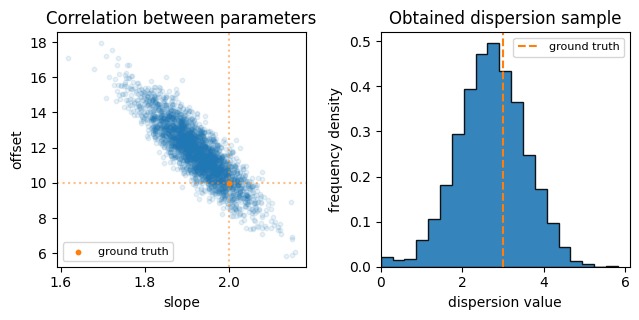

In [25]:
# Some previous calculations with the values used in the fit.
ranges = [samples[:,i].max() - samples[:,i].min() for i in [0,1]]
q1 = 0.02 if max(ranges) > 100. else 0.
q2 = 1 - q1
if q1 > 0:
    x1, x2 = [np.quantile(samples[:,0], qi) for qi in [q1, q2]]
    y1, y2 = [np.quantile(samples[:,1], qi) for qi in [q1, q2]]
    margin = 0.05
    xlims = np.array([min(x1, slope_true), max(x2, slope_true)])
    ylims = np.array([min(y1, offset_true), max(y2, offset_true)])
    xlims += np.array([-1, 1]) * margin * np.diff(xlims)
    ylims += np.array([-1, 1]) * margin * np.diff(ylims)
else:
    xlims, ylims = None, None
# Plot of the distribution of values used in the fit.
plt.figure(2, figsize=(6.5,3.3))
plt.clf()
# Subplot for the correlation between the offset and the slope.
plt.subplot(1,2,1)
plt.scatter(samples[:,0], samples[:,1], color=color_samples,
            s=10, alpha=0.1)
if plot_truth:
    plt.scatter(slope_true, offset_true, color=color_truth, s=10,
                label='ground truth')
    plt.axvline(slope_true, color=color_truth, lw=1.5, ls=':', alpha=0.5)
    plt.axhline(offset_true, color=color_truth, lw=1.5, ls=':', alpha=0.5)
    plt.legend(fontsize=8)
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel('slope')
plt.ylabel('offset')
plt.title('Correlation between parameters')
# Some calculations again.
dispersion_sample = result['dispersion sample']
if q1 > 0:
    lim1, lim2 = [np.quantile(dispersion_sample, qi) for qi in [q1, q2]]
    cond = (dispersion_sample > lim1) & (dispersion_sample < lim2)
    dispersion_sample = dispersion_sample[cond]
else:
    lim1, lim2 = 0, None
# Subplot with the distribution of the possible real dispersion of the data.
plt.subplot(1,2,2)
plt.hist(dispersion_sample, density=True, bins=20,
         histtype='stepfilled', edgecolor='k', alpha=0.9)
if plot_truth:
    plt.axvline(x=dispersion_y, color=color_truth, lw=1.5, ls='--',
                label='ground truth')
    plt.legend(fontsize=8)
plt.xlim(lim1, lim2)
plt.xlabel('dispersion value')
plt.ylabel('frequency density')
plt.title('Obtained dispersion sample')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

In the left plot we can see the correlation between our two fitted parameters: the offset and the slope. The ground truth lies between the values obtained.

In the right plot we can see the distribution of estimated real dispersions for the $y$ values. Again, the ground truth is included in the obtained range of values.

That's it! Congratulations for finishing the tutorial.